---
<center>

  # **Tarea 05**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

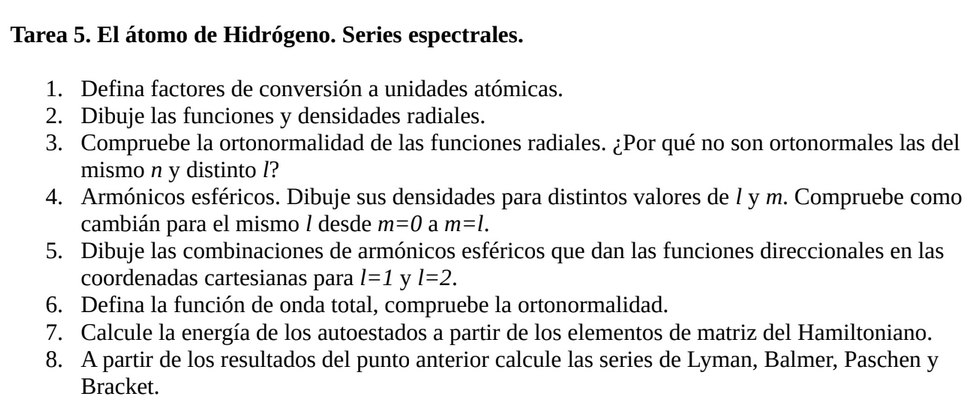

In [ ]:
# Libreriras a importar
import numpy as np
import sympy as sp

from sympy.physics.hydrogen import Psi_nlm

# 1.

Factores de conversión

In [1]:
"""
Factores de conversión a Unidades Atómicas (Atomic Units - AU)

En el sistema de unidades atómicas:
- Masa del electrón: me = 1
- Carga elemental: e = 1
- Constante de Planck reducida: ℏ = 1
- Constante de Coulomb: ke = 1/(4πε0) = 1
- Radio de Bohr: a0 = 1
"""
# ============================================================================
# CONSTANTES FUNDAMENTALES EN SI
# ============================================================================

class PhysicalConstants:
    """Constantes físicas fundamentales en unidades SI"""
    
    # Constantes básicas
    c = 299792458.0                    # Velocidad de la luz [m/s]
    h = 6.62607015e-34                 # Constante de Planck [J·s]
    hbar = 1.054571817e-34             # Constante de Planck reducida [J·s]
    e = 1.602176634e-19                # Carga elemental [C]
    me = 9.1093837015e-31              # Masa del electrón [kg]
    mp = 1.67262192369e-27             # Masa del protón [kg]
    epsilon_0 = 8.8541878128e-12       # Permitividad del vacío [F/m]
    mu_0 = 1.25663706212e-6            # Permeabilidad del vacío [H/m]
    k_B = 1.380649e-23                 # Constante de Boltzmann [J/K]
    N_A = 6.02214076e23                # Número de Avogadro [mol⁻¹]
    
    # Constantes derivadas
    ke = 8.9875517923e9                # Constante de Coulomb [N·m²/C²]
    alpha = 7.2973525693e-3            # Constante de estructura fina (adimensional)
    a0 = 5.29177210903e-11             # Radio de Bohr [m]
    Eh = 4.3597447222071e-18           # Hartree (energía) [J]
    

# ============================================================================
# UNIDADES ATÓMICAS (AU)
# ============================================================================

class AtomicUnits:
    """
    Definición de unidades atómicas
    1 AU = valor en unidades SI
    """
    
    # Unidades básicas
    mass = PhysicalConstants.me                          # 1 au_mass = me [kg]
    charge = PhysicalConstants.e                         # 1 au_charge = e [C]
    action = PhysicalConstants.hbar                      # 1 au_action = ℏ [J·s]
    
    # Unidades derivadas fundamentales
    length = PhysicalConstants.a0                        # 1 au_length = a0 (bohr) [m]
    energy = PhysicalConstants.Eh                        # 1 au_energy = Eh (hartree) [J]
    time = PhysicalConstants.hbar / PhysicalConstants.Eh # 1 au_time [s]
    velocity = PhysicalConstants.a0 * PhysicalConstants.Eh / PhysicalConstants.hbar  # [m/s]
    
    # Otras unidades derivadas
    momentum = PhysicalConstants.hbar / PhysicalConstants.a0  # [kg·m/s]
    force = PhysicalConstants.Eh / PhysicalConstants.a0       # [N]
    electric_field = PhysicalConstants.Eh / (PhysicalConstants.e * PhysicalConstants.a0)  # [V/m]
    magnetic_field = PhysicalConstants.hbar / (PhysicalConstants.e * PhysicalConstants.a0**2)  # [T]
    
    # Valores numéricos
    bohr = PhysicalConstants.a0        # Radio de Bohr [m]
    hartree = PhysicalConstants.Eh     # Hartree [J]
    

# ============================================================================
# CONVERSIONES DE UNIDADES ATÓMICAS A OTRAS UNIDADES
# ============================================================================

class AU_to_SI:
    """Conversión de unidades atómicas (AU) a unidades SI"""
    
    # Longitud
    length = AtomicUnits.length                    # 1 au → m
    bohr_to_m = AtomicUnits.bohr                   # 1 bohr → m
    bohr_to_angstrom = AtomicUnits.bohr * 1e10     # 1 bohr → Å
    bohr_to_nm = AtomicUnits.bohr * 1e9            # 1 bohr → nm
    
    # Energía
    energy = AtomicUnits.energy                    # 1 au → J
    hartree_to_J = AtomicUnits.hartree             # 1 Ha → J
    hartree_to_eV = AtomicUnits.hartree / PhysicalConstants.e  # 1 Ha → eV
    hartree_to_kcal_mol = (AtomicUnits.hartree / PhysicalConstants.e) * PhysicalConstants.N_A / 4184  # 1 Ha → kcal/mol
    hartree_to_kJ_mol = (AtomicUnits.hartree / PhysicalConstants.e) * PhysicalConstants.N_A / 1000    # 1 Ha → kJ/mol
    hartree_to_cm_inv = AtomicUnits.hartree / (PhysicalConstants.h * PhysicalConstants.c * 100)  # 1 Ha → cm⁻¹
    
    # Tiempo
    time = AtomicUnits.time                        # 1 au → s
    time_to_fs = AtomicUnits.time * 1e15           # 1 au → fs
    time_to_ps = AtomicUnits.time * 1e12           # 1 au → ps
    
    # Velocidad
    velocity = AtomicUnits.velocity                # 1 au → m/s
    
    # Masa
    mass = AtomicUnits.mass                        # 1 au → kg
    mass_to_amu = AtomicUnits.mass * PhysicalConstants.N_A * 1000  # 1 au → u (amu)
    
    # Campo eléctrico
    electric_field = AtomicUnits.electric_field    # 1 au → V/m
    electric_field_to_V_angstrom = AtomicUnits.electric_field * 1e-10  # 1 au → V/Å
    
    # Campo magnético
    magnetic_field = AtomicUnits.magnetic_field    # 1 au → T
    
    # Fuerza
    force = AtomicUnits.force                      # 1 au → N
    
    # Momento
    momentum = AtomicUnits.momentum                # 1 au → kg·m/s


# ============================================================================
# CONVERSIONES DE OTRAS UNIDADES A UNIDADES ATÓMICAS
# ============================================================================

class SI_to_AU:
    """Conversión de unidades SI a unidades atómicas (AU)"""
    
    # Longitud
    m_to_bohr = 1.0 / AU_to_SI.bohr_to_m
    angstrom_to_bohr = 1.0 / AU_to_SI.bohr_to_angstrom
    nm_to_bohr = 1.0 / AU_to_SI.bohr_to_nm
    
    # Energía
    J_to_hartree = 1.0 / AU_to_SI.hartree_to_J
    eV_to_hartree = 1.0 / AU_to_SI.hartree_to_eV
    kcal_mol_to_hartree = 1.0 / AU_to_SI.hartree_to_kcal_mol
    kJ_mol_to_hartree = 1.0 / AU_to_SI.hartree_to_kJ_mol
    cm_inv_to_hartree = 1.0 / AU_to_SI.hartree_to_cm_inv
    
    # Tiempo
    s_to_au = 1.0 / AU_to_SI.time
    fs_to_au = 1.0 / AU_to_SI.time_to_fs
    ps_to_au = 1.0 / AU_to_SI.time_to_ps
    
    # Masa
    amu_to_au = 1.0 / AU_to_SI.mass_to_amu


# ============================================================================
# FUNCIONES DE CONVERSIÓN
# ============================================================================

def convert_length(value, from_unit='bohr', to_unit='angstrom'):
    """
    Convierte longitudes entre diferentes unidades
    
    Unidades disponibles: 'bohr', 'angstrom', 'nm', 'm', 'au'
    """
    # Convertir a bohr (unidades atómicas)
    if from_unit == 'bohr' or from_unit == 'au':
        value_in_bohr = value
    elif from_unit == 'angstrom':
        value_in_bohr = value * SI_to_AU.angstrom_to_bohr
    elif from_unit == 'nm':
        value_in_bohr = value * SI_to_AU.nm_to_bohr
    elif from_unit == 'm':
        value_in_bohr = value * SI_to_AU.m_to_bohr
    else:
        raise ValueError(f"Unidad desconocida: {from_unit}")
    
    # Convertir de bohr a la unidad deseada
    if to_unit == 'bohr' or to_unit == 'au':
        return value_in_bohr
    elif to_unit == 'angstrom':
        return value_in_bohr * AU_to_SI.bohr_to_angstrom
    elif to_unit == 'nm':
        return value_in_bohr * AU_to_SI.bohr_to_nm
    elif to_unit == 'm':
        return value_in_bohr * AU_to_SI.bohr_to_m
    else:
        raise ValueError(f"Unidad desconocida: {to_unit}")


def convert_energy(value, from_unit='hartree', to_unit='eV'):
    """
    Convierte energías entre diferentes unidades
    
    Unidades disponibles: 'hartree', 'au', 'eV', 'J', 'kcal/mol', 'kJ/mol', 'cm-1'
    """
    # Convertir a hartree (unidades atómicas)
    if from_unit == 'hartree' or from_unit == 'au':
        value_in_hartree = value
    elif from_unit == 'eV':
        value_in_hartree = value * SI_to_AU.eV_to_hartree
    elif from_unit == 'J':
        value_in_hartree = value * SI_to_AU.J_to_hartree
    elif from_unit == 'kcal/mol':
        value_in_hartree = value * SI_to_AU.kcal_mol_to_hartree
    elif from_unit == 'kJ/mol':
        value_in_hartree = value * SI_to_AU.kJ_mol_to_hartree
    elif from_unit == 'cm-1':
        value_in_hartree = value * SI_to_AU.cm_inv_to_hartree
    else:
        raise ValueError(f"Unidad desconocida: {from_unit}")
    
    # Convertir de hartree a la unidad deseada
    if to_unit == 'hartree' or to_unit == 'au':
        return value_in_hartree
    elif to_unit == 'eV':
        return value_in_hartree * AU_to_SI.hartree_to_eV
    elif to_unit == 'J':
        return value_in_hartree * AU_to_SI.hartree_to_J
    elif to_unit == 'kcal/mol':
        return value_in_hartree * AU_to_SI.hartree_to_kcal_mol
    elif to_unit == 'kJ/mol':
        return value_in_hartree * AU_to_SI.hartree_to_kJ_mol
    elif to_unit == 'cm-1':
        return value_in_hartree * AU_to_SI.hartree_to_cm_inv
    else:
        raise ValueError(f"Unidad desconocida: {to_unit}")


def convert_time(value, from_unit='au', to_unit='fs'):
    """
    Convierte tiempos entre diferentes unidades
    
    Unidades disponibles: 'au', 's', 'fs', 'ps'
    """
    # Convertir a au
    if from_unit == 'au':
        value_in_au = value
    elif from_unit == 's':
        value_in_au = value * SI_to_AU.s_to_au
    elif from_unit == 'fs':
        value_in_au = value * SI_to_AU.fs_to_au
    elif from_unit == 'ps':
        value_in_au = value * SI_to_AU.ps_to_au
    else:
        raise ValueError(f"Unidad desconocida: {from_unit}")
    
    # Convertir a la unidad deseada
    if to_unit == 'au':
        return value_in_au
    elif to_unit == 's':
        return value_in_au * AU_to_SI.time
    elif to_unit == 'fs':
        return value_in_au * AU_to_SI.time_to_fs
    elif to_unit == 'ps':
        return value_in_au * AU_to_SI.time_to_ps
    else:
        raise ValueError(f"Unidad desconocida: {to_unit}")


# ============================================================================
# FUNCIÓN PARA IMPRIMIR TABLA DE CONVERSIONES
# ============================================================================

def print_conversion_table():
    """Imprime una tabla completa de factores de conversión"""
    
    print("=" * 80)
    print("FACTORES DE CONVERSIÓN A UNIDADES ATÓMICAS (AU)")
    print("=" * 80)
    
    print("\n📏 LONGITUD:")
    print(f"  1 bohr (au)      = {AU_to_SI.bohr_to_m:.6e} m")
    print(f"  1 bohr           = {AU_to_SI.bohr_to_angstrom:.10f} Å")
    print(f"  1 bohr           = {AU_to_SI.bohr_to_nm:.10f} nm")
    print(f"  1 Å              = {SI_to_AU.angstrom_to_bohr:.10f} bohr")
    
    print("\n⚡ ENERGÍA:")
    print(f"  1 hartree (au)   = {AU_to_SI.hartree_to_J:.6e} J")
    print(f"  1 hartree        = {AU_to_SI.hartree_to_eV:.10f} eV")
    print(f"  1 hartree        = {AU_to_SI.hartree_to_kcal_mol:.10f} kcal/mol")
    print(f"  1 hartree        = {AU_to_SI.hartree_to_kJ_mol:.10f} kJ/mol")
    print(f"  1 hartree        = {AU_to_SI.hartree_to_cm_inv:.10f} cm⁻¹")
    print(f"  1 eV             = {SI_to_AU.eV_to_hartree:.10f} hartree")
    
    print("\n⏱️  TIEMPO:")
    print(f"  1 au_time        = {AU_to_SI.time:.6e} s")
    print(f"  1 au_time        = {AU_to_SI.time_to_fs:.10f} fs")
    print(f"  1 au_time        = {AU_to_SI.time_to_ps:.10f} ps")
    
    print("\n🏃 VELOCIDAD:")
    print(f"  1 au_velocity    = {AU_to_SI.velocity:.6e} m/s")
    print(f"  1 au_velocity    = {AU_to_SI.velocity/PhysicalConstants.c:.10f} c")
    
    print("\n⚖️  MASA:")
    print(f"  1 au_mass        = {AU_to_SI.mass:.6e} kg")
    print(f"  1 au_mass        = {AU_to_SI.mass_to_amu:.10f} u (amu)")
    
    print("\n🔌 CAMPO ELÉCTRICO:")
    print(f"  1 au_E           = {AU_to_SI.electric_field:.6e} V/m")
    print(f"  1 au_E           = {AU_to_SI.electric_field_to_V_angstrom:.6e} V/Å")
    
    print("\n🧲 CAMPO MAGNÉTICO:")
    print(f"  1 au_B           = {AU_to_SI.magnetic_field:.6e} T")
    
    print("\n💪 FUERZA:")
    print(f"  1 au_force       = {AU_to_SI.force:.6e} N")
    
    print("\n" + "=" * 80)


# ============================================================================
# EJEMPLOS DE USO
# ============================================================================

def main():
    """Ejemplos de uso de las conversiones"""
    
    print_conversion_table()
    
    print("\n" + "=" * 80)
    print("EJEMPLOS DE CONVERSIÓN")
    print("=" * 80)
    
    # Ejemplo 1: Distancia de enlace C-C
    print("\n📌 Ejemplo 1: Distancia de enlace C-C típica")
    dist_angstrom = 1.54  # Å
    dist_bohr = convert_length(dist_angstrom, 'angstrom', 'bohr')
    print(f"  {dist_angstrom} Å = {dist_bohr:.6f} bohr")
    
    # Ejemplo 2: Energía de ionización del hidrógeno
    print("\n📌 Ejemplo 2: Energía de ionización del H")
    E_eV = 13.6  # eV
    E_hartree = convert_energy(E_eV, 'eV', 'hartree')
    print(f"  {E_eV} eV = {E_hartree:.6f} hartree")
    print(f"  {E_eV} eV = {convert_energy(E_eV, 'eV', 'kcal/mol'):.2f} kcal/mol")
    
    # Ejemplo 3: Tiempo de un femtosegundo
    print("\n📌 Ejemplo 3: 1 femtosegundo en unidades atómicas")
    time_fs = 1.0  # fs
    time_au = convert_time(time_fs, 'fs', 'au')
    print(f"  {time_fs} fs = {time_au:.6f} au_time")
    
    # Ejemplo 4: Conversión de energías típicas
    print("\n📌 Ejemplo 4: Energías típicas en química")
    energies = {
        'Enlace C-H': (100, 'kcal/mol'),
        'Enlace H': (104, 'kcal/mol'),
        'Puente de H': (5, 'kcal/mol'),
        'kT (300K)': (0.026, 'eV')
    }
    
    for name, (value, unit) in energies.items():
        E_au = convert_energy(value, unit, 'hartree')
        print(f"  {name}: {value} {unit} = {E_au:.6f} hartree")
    
    print("\n" + "=" * 80)


if __name__ == "__main__":
    main()

FACTORES DE CONVERSIÓN A UNIDADES ATÓMICAS (AU)

📏 LONGITUD:
  1 bohr (au)      = 5.291772e-11 m
  1 bohr           = 0.5291772109 Å
  1 bohr           = 0.0529177211 nm
  1 Å              = 1.8897261246 bohr

⚡ ENERGÍA:
  1 hartree (au)   = 4.359745e-18 J
  1 hartree        = 27.2113862460 eV
  1 hartree        = 3916606076674663514112.0000000000 kcal/mol
  1 hartree        = 16387079824806791610368.0000000000 kJ/mol
  1 hartree        = 219474.6313631965 cm⁻¹
  1 eV             = 0.0367493222 hartree

⏱️  TIEMPO:
  1 au_time        = 2.418884e-17 s
  1 au_time        = 0.0241888433 fs
  1 au_time        = 0.0000241888 ps

🏃 VELOCIDAD:
  1 au_velocity    = 2.187691e+06 m/s
  1 au_velocity    = 0.0072973526 c

⚖️  MASA:
  1 au_mass        = 9.109384e-31 kg
  1 au_mass        = 0.0005485799 u (amu)

🔌 CAMPO ELÉCTRICO:
  1 au_E           = 5.142207e+11 V/m
  1 au_E           = 5.142207e+01 V/Å

🧲 CAMPO MAGNÉTICO:
  1 au_B           = 2.350518e+05 T

💪 FUERZA:
  1 au_force       = 8.23872

# 7.

A partir de $\psi_{nlm}(r, \theta, \varphi)$ y de los valores medios del Hamiltoniano. Calcular las lineas epsectrales de las series de Lyman, Balmer, Pascher y Brackett.

Tenemos que para el átomo de hidorgeno el Hamiltoniano se define como: 

<center>

$\hat{H} = - \frac{\hbar^2}{2 \mu} (\frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r}) + \frac{1}{2 \mu r^2} \hat{L}^2 + V(r) $

</center>

Con $V(r) = -\frac{1}{4 \pi \epsilon_0} \frac{e^2}{r}$

Obtenemos que los autoestados para el átomo de hidrogeno van a estar dados por:

<center>

$ \Psi_{n\ell m}(r, \theta, \varphi) = R_{n\ell }(r) Y_{\ell }^{m}(\theta, \varphi) $

</center>

Tenemos que la función $R_{nl}(r)$ va a estar compuesta por los polinomios de Laguerre:

<center>

$ R_{n\ell}(r) = \left[ \frac{(n - \ell - 1)!}{2n (n + \ell)!}\right]^{1/2} \left( \frac{2 Z r}{n} \right)^{\ell + \frac{3}{2}} r^{\ell} e^{- \frac{Z r \mu}{n}} L_{n - \ell - 1}^{2\ell + 1} \left( \frac{2 Z r}{n} \right) $

</center>

Realizando el cambio de variable: 

* $ \rho = \frac{2 r}{n a_0} $
* $ a_0 = \frac{4 \pi \epsilon_0 \hbar^2}{\mu e^2} $: es el radio de Bohr

Nos queda que: 

<center>

$ R_{n\ell}(r) = \left[  \left( \frac{2}{n a_0} \right)^3 \frac{(n - \ell - 1)!}{2n (n + \ell)!}\right]^{1/2} \rho^{\ell} e^{- \frac{\rho}{2}} L_{n - \ell - 1}^{2\ell + 1} \left( \rho\right) $

</center>

Tenemos que $Y_{\ell }^{m}(\theta, \varphi) $ son los armonicos esféricos 

In [2]:
# Definición de las constantes en el sistema de unidades atomicas
mu = 1  # masa reducida
hbar = 1  # constante de Planck reducida
e = 1  # carga del electron
a0 = 1  # radio de Bohr

In [3]:
# Definición de los simbolos a utilizar en las coordenadas esfericas
r, theta, phi = sp.symbols("r theta phi", real=True)

### Definición de los operadores del momento angular

Se van a definir los operadores del momento angular en coordenadas esfericas, las cuales van a estar dadas por:

*  $\hat{L}_x = i \hbar (\sin \varphi \frac{\partial}{\partial \theta} + \cot \theta \cos \varphi \frac{\partial}{\partial \varphi})$

*  $\hat{L}_y = -i \hbar (\cos \varphi \frac{\partial}{\partial \theta} + \cot \theta \sin \varphi \frac{\partial}{\partial \varphi})$

*  $\hat{L}_z = i \hbar \frac{\partial}{\partial \varphi}$

*  $\hat{L}_y = -\hbar^2 (\frac{\partial^2}{\partial \theta^2} + \cot \theta \frac{\partial}{\partial \theta} + \frac{1}{\sin^2 \theta}\frac{\partial^2}{\partial \varphi^2}) = -\hbar^2 (\frac{1}{\sin \theta} \frac{\partial}{\partial \theta}(\sin \theta \frac{\partial}{\partial \theta}) + \frac{1}{\sin^2 \theta}\frac{\partial^2}{\partial \varphi^2})$

In [4]:
# Definición de los operadores del momento angular
def Lx(f):
    return (
        1j
        * hbar
        * (
            sp.sin(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.cos(phi) * sp.diff(f, phi)
        )
    )


def Ly(f):
    return (
        1j
        * hbar
        * (
            -sp.cos(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.sin(phi) * sp.diff(f, phi)
        )
    )


def Lz(f):
    return -1j * hbar * sp.diff(f, phi)


def L2(f):
    return sp.simplify(
        -(hbar**2)
        * (
            1 / sp.sin(theta) * sp.diff(sp.sin(theta) * sp.diff(f, theta), theta)
            + 1 / sp.sin(theta) ** 2 * sp.diff(f, phi, 2)
        )
    )


### Definición del Hamiltoniano

Definimos al Hamiltoniano como: 

<center>

$ \hat{H} = - \frac{\hbar^2}{2 \mu} (\frac{\partial^{2}}{\partial r^2} + \frac{2}{r} \frac{\partial}{\partial r}) + \frac{1}{2 \mu r^2} \hat{L}^2 + V(r)$

</center>

In [5]:
def Hamiltoniano(f):
    return (
        -(hbar**2) / (2 * mu) * (1 / r) * sp.diff(r * f, r, 2)  # Termino cinetico 
        + 1 / (2 * mu * r**2) * L2(f)                           # Termino del momento angular
        - e**2 / r * f                                          # Potencial
    )

## Calculo de la energía de los fotonos

Sabemos que las energías permitidas para la absorción o emisión de fotones en un átomo de hidrogeno van a estar dadas por: 

<center>

$ \Delta E = \hbar \omega = h \nu = \frac{h c}{\lambda}$

</center>

 Con lo que las longitudes de ondas permitidas para la emisión y absorción para el átomo de hidrogeno van a ser:  


<center>

$ \lambda = \frac{h c}{\Delta E}$

</center>

### Energías permitidas del átomo de hidrogeno

Para realizar el cálculo de las energías permitidas en el átomo de hidrogeno, tenemos que recordar que estas van a estar dadas por la diagonalización de la matriz del Hamiltoniano, pero al calcular dicha matriz con sus auto funciones (eigenfunciones, auto vectores) se obtienen directamente dichos valores.  

<center>

$ E_{nlm} = \braket{nlm | \hat{H} | nlm} $

</center>

$$ E_{nlm} = \int_{0}^{2\pi} \int_{0}^{\pi} \int_{0}^{\infty} \Psi_{n l m}^{*}(r, \theta, \varphi)\hat{\mathcal{H}}\Psi_{n l m}(r, \theta, \varphi)  r^{2} \sin(\theta) \text{d}r  \text{d}\varphi \text{d}\theta $$

In [6]:
def Enlm (n, l = 0, m=0):  # noqa: E741
    # Definición de la función de onda del átomo de hidrogeno
    Psi_nlm_expr = Psi_nlm(n, l, m, r, theta, phi).expand(func=True)

    # Cálculo del Hamiltoniano actuando sobre la función de onda
    H_Psi = Hamiltoniano(Psi_nlm_expr)

    # Cálculo de la energía esperada
    integrand = sp.conjugate(Psi_nlm_expr) * H_Psi * r**2 * sp.sin(theta)
    energy = sp.integrate(
        sp.integrate(
            sp.integrate(integrand, (r, 0, sp.oo)),
            (theta, 0, sp.pi)
        ),
        (phi, 0, 2 * sp.pi)
    )

    return sp.simplify(energy)

In [7]:
# Mostarar las energías permitidas para los primeros 10 niveles
print("Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:")
print("-------------------------------------------------------------")
print("Nivel n \t| Energía (a.u.)")
for n in range(1, 11):
    energy = Enlm(n)
    print(f"E_{n}  \t\t {energy:.4f}")

Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:
-------------------------------------------------------------
Nivel n 	| Energía (a.u.)
E_1  		 -0.5000
E_2  		 -0.1250
E_3  		 -0.0556
E_4  		 -0.0313
E_5  		 -0.0200
E_6  		 -0.0139
E_7  		 -0.0102
E_8  		 -0.0078
E_9  		 -0.0062
E_10  		 -0.0050


In [8]:
# Valor medido de la energia en Jouls
hartee2jouls= 4.35974e-18
print("Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:")
print("-------------------------------------------------------------")
print("Nivel n \t| Energía (Jouls)")
for n in range(1, 11):
    energy = Enlm(n)
    print(f"E_{n}  \t\t {energy * hartee2jouls:.4e}")


Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:
-------------------------------------------------------------
Nivel n 	| Energía (Jouls)
E_1  		 -2.1799e-18
E_2  		 -5.4497e-19
E_3  		 -2.4221e-19
E_4  		 -1.3624e-19
E_5  		 -8.7195e-20
E_6  		 -6.0552e-20
E_7  		 -4.4487e-20
E_8  		 -3.4060e-20
E_9  		 -2.6912e-20
E_10  		 -2.1799e-20


# 8.

In [14]:
# Función para encontrar las longitudes de onda permitidas
def longitudes_de_onda(n1, n2):
    # Cálculo de las energías para los niveles n1 y n2
    E1 = Enlm(n1)
    E2 = Enlm(n2)

    # Cálculo de la diferencia de energía
    delta_E = abs(E2 - E1)

    # Cálculo de la longitud de onda permitida
    h =  6.626070150e-34                                    # Constante de Planck [Js]
    c = 3e8                                                 # Velocidad de la luz en unidades atómicas [m/s]
    lambda_permitida = h * c / (delta_E * hartee2jouls)     # Convertir a Joules

    return lambda_permitida

# Función para encontrar las series espectrales
def series_espectrales(n_base, n_max):
    series = {}
    n1 = n_base
    for n2 in range(n1 + 1, n_max + 1):
        lambda_permitida = longitudes_de_onda(n1, n2)
        series[(n1, n2)] = lambda_permitida
    return series

# Ejemplo de uso: encontrar las longitudes de onda permitidas para las transiciones entre los primeros 5 niveles
m2nm = 1e9  # metros a nanometros
n_max = 4

nombre_seria = "Lyman"  # Cambiar a "Balmer" o "Paschen" para otras series

valores_n = {
    "Lyman": 1,
    "Balmer": 2,
    "Paschen": 3,
    "Brackett": 4,
    "Pfund": 5,
    "Humphreys": 6,
}

if nombre_seria in valores_n:
    n_base = valores_n[nombre_seria]
else:
    raise ValueError(f"Nombre de serie no válido. Use {sorted(valores_n.keys())}.")



series = series_espectrales(n_base, n_max)
print(f"Serie de {nombre_seria}")
print(f"\nLongitudes de onda permitidas para las transiciones entre los primeros {n_max} niveles del átomo de Hidogeno:")
print("-------------------------------------------------------------")
print("Transición (n1 -> n2) \t| Longitud de onda (m)")
for (n1, n2), lambda_permitida in series.items():
    print(f"{n2} -> {n1} \t\t\t {lambda_permitida*m2nm:.2f} nm")


Serie de Lyman

Longitudes de onda permitidas para las transiciones entre los primeros 4 niveles del átomo de Hidogeno:
-------------------------------------------------------------
Transición (n1 -> n2) 	| Longitud de onda (m)
2 -> 1 			 121.59 nm
3 -> 1 			 102.59 nm
4 -> 1 			 97.27 nm
